# Проверка гипотез интернет-магазина

## Описание проекта

Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга я подготовил список гипотез для увеличения выручки.

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**Приоритизация гипотез**

В файле `hypothesis.csv` приведены 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача:

1. Применить фреймворк ICE для приоритизации гипотез и отсортировать их по убыванию приоритета;
2. Применить фреймворк RICE для приоритизации гипотез и отсортировать их по убыванию приоритета;
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE, и объяснить, почему так произошло.

**Анализ A/B-теста**

Предполагается, что я провёл A/B-тест и получил результаты, которые описаны в файлах `orders.csv` и `visitors.csv`.

Задача состоит в анализе A/B-теста. Для этого необходимо:

1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения;
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения;
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения;
4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения;
5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения;
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения;
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей;
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения;
9. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов;
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения;
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения;
12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения;
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения;
14. Принять решение по результатам теста и объяснить его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп;
    2. Остановить тест, зафиксировать отсутствие различий между группами;
    3. Продолжить тест.

## Описание данных

`hypothesis.csv`

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

`orders.csv`

- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.


`visitors.csv`

- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

## Подготовительный этап

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
hypothesis, orders, visitors = (
    pd.read_csv('hypothesis.csv'),
    pd.read_csv('orders.csv'),
    pd.read_csv('visitors.csv'))

## Приоритизация гипотез

In [3]:
# Увеличим максимальную ширину столбцов, чтобы все строки поместились
pd.set_option('display.max_colwidth', 110)

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### Применение фреймворка ICE для приоритизации гипотез

In [4]:
# Рассчитаем ICE для каждой гипотезы
hypothesis['ICE'] = ((hypothesis['Impact'] 
                     * hypothesis['Confidence']
                     / hypothesis['Efforts'])
                     .round(2))

# Отсортируем гипотезы по убыванию ICE
sorted_by_ice = hypothesis.sort_values(by='ICE', ascending=False)

sorted_by_ice

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


### Применение фреймворка RICE для приоритизации гипотез

In [5]:
# Рассчитаем RICE для каждой гипотезы
hypothesis['RICE'] = (hypothesis['Reach']
                      * hypothesis['Impact']
                      * hypothesis['Confidence']
                      / hypothesis['Efforts'])

# Отсортируем гипотез по убыванию RICE
sorted_by_rice = hypothesis.sort_values(by='RICE', ascending=False)

sorted_by_rice

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


### Выводы по итогам применения фреймворков

Параметр Reach (охват) отражает, как много пользователей затронет изменение. Гипотезы с высоким Reach получают больший приоритет в RICE.

`Гипотеза 7` **"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"** стала первой (была третьй).

`Гипотеза 2` **"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"** стала второй (была пятой).

`Гипотеза 8` **"Запустить акцию, дающую скидку на товар в день рождения"** стала пятой (была первой).

Если важен максимальный охват аудитории, следует использовать RICE. Если в приоритете сила влияния и уверенности в гипотезе без учета охвата, подойдет ICE.

## Анализ A/B-теста

In [6]:
display(orders, visitors)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [7]:
# Напишем функцию по первичному анализу датафрейма
def analyze_dataframe(df):
    # Проверим данные на пропуски
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    display('Пропущенные значения по столбцам:', missing_values)
    display('Процент пропущенных значений по столбцам:', missing_percentage)

    # Проверим данные на дубликаты
    display('Количество дубликатов:', df.duplicated().sum())

    # Выведем типы данных
    display('Типы данных:', df.dtypes)

    # Выведем статистики
    display('Базовая статистика:', df.describe())

    # Выведем уникальные и отсортированные значения в каждом столбце
    for column in df.columns:
        unique_values_series = pd.Series(df[column].unique()).sort_values()
        display(f'Отсортированные уникальные значения в столбце {column}:', unique_values_series)

In [8]:
# Применим функцию по первичному анализу датафрейма к 'orders'
analyze_dataframe(orders)

'Пропущенные значения по столбцам:'

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

'Процент пропущенных значений по столбцам:'

transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

'Количество дубликатов:'

0

'Типы данных:'

transactionId     int64
visitorId         int64
date             object
revenue           int64
group            object
dtype: object

'Базовая статистика:'

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


'Отсортированные уникальные значения в столбце transactionId:'

909        1062393
66         4919758
1068       7210578
852        8131427
603       11068804
           ...    
325     4276811111
1084    4279408906
1169    4281129020
365     4288552432
703     4293855558
Length: 1197, dtype: int64

'Отсортированные уникальные значения в столбце visitorId:'

55        5114589
513       6958315
70        8300375
213      11685486
800      39475350
          ...    
590    4266935830
776    4278982564
516    4279090005
357    4281247801
851    4283872382
Length: 1031, dtype: int64

'Отсортированные уникальные значения в столбце date:'

2     2019-08-01
6     2019-08-02
9     2019-08-03
16    2019-08-04
21    2019-08-05
13    2019-08-06
19    2019-08-07
24    2019-08-08
18    2019-08-09
25    2019-08-10
27    2019-08-11
28    2019-08-12
29    2019-08-13
30    2019-08-14
0     2019-08-15
1     2019-08-16
4     2019-08-17
7     2019-08-18
12    2019-08-19
17    2019-08-20
23    2019-08-21
3     2019-08-22
5     2019-08-23
8     2019-08-24
10    2019-08-25
14    2019-08-26
22    2019-08-27
11    2019-08-28
15    2019-08-29
20    2019-08-30
26    2019-08-31
dtype: object

'Отсортированные уникальные значения в столбце revenue:'

345         50
597         60
307         70
587         75
247         76
        ...   
502      86620
691      92550
560      93940
712     202740
323    1294500
Length: 713, dtype: int64

'Отсортированные уникальные значения в столбце group:'

1    A
0    B
dtype: object

In [9]:
# Применим функцию по первичному анализу датафрейма к 'visitors'
analyze_dataframe(visitors)

'Пропущенные значения по столбцам:'

date        0
group       0
visitors    0
dtype: int64

'Процент пропущенных значений по столбцам:'

date        0.0
group       0.0
visitors    0.0
dtype: float64

'Количество дубликатов:'

0

'Типы данных:'

date        object
group       object
visitors     int64
dtype: object

'Базовая статистика:'

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


'Отсортированные уникальные значения в столбце date:'

0     2019-08-01
1     2019-08-02
2     2019-08-03
3     2019-08-04
4     2019-08-05
5     2019-08-06
6     2019-08-07
7     2019-08-08
8     2019-08-09
9     2019-08-10
10    2019-08-11
11    2019-08-12
12    2019-08-13
13    2019-08-14
14    2019-08-15
15    2019-08-16
16    2019-08-17
17    2019-08-18
18    2019-08-19
19    2019-08-20
20    2019-08-21
21    2019-08-22
22    2019-08-23
23    2019-08-24
24    2019-08-25
25    2019-08-26
26    2019-08-27
27    2019-08-28
28    2019-08-29
29    2019-08-30
30    2019-08-31
dtype: object

'Отсортированные уникальные значения в столбце group:'

0    A
1    B
dtype: object

'Отсортированные уникальные значения в столбце visitors:'

15    361
39    369
53    378
23    395
9     406
16    412
45    413
46    421
22    468
48    487
29    490
18    502
2     507
33    509
57    531
41    543
44    544
52    546
49    560
19    575
28    577
32    581
27    594
11    595
21    609
7     610
8     617
1     619
24    621
14    628
6     644
20    646
51    650
38    654
36    655
50    656
5     667
17    668
55    676
54    679
30    699
35    707
37    709
26    711
31    713
3     717
10    718
0     719
56    720
40    721
25    722
13    735
47    737
43    746
12    748
4     756
42    769
34    770
dtype: int64

- Пропущенные значения в обоих датафреймах отсутствуют
- Дубликаты в обоих датафреймах отсутствуют
- Данные представлены за август 2019 года

In [10]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [11]:
print(orders.dtypes)
print(visitors.dtypes)

transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object
date        datetime64[ns]
group               object
visitors             int64
dtype: object


### График кумулятивной выручки по группам

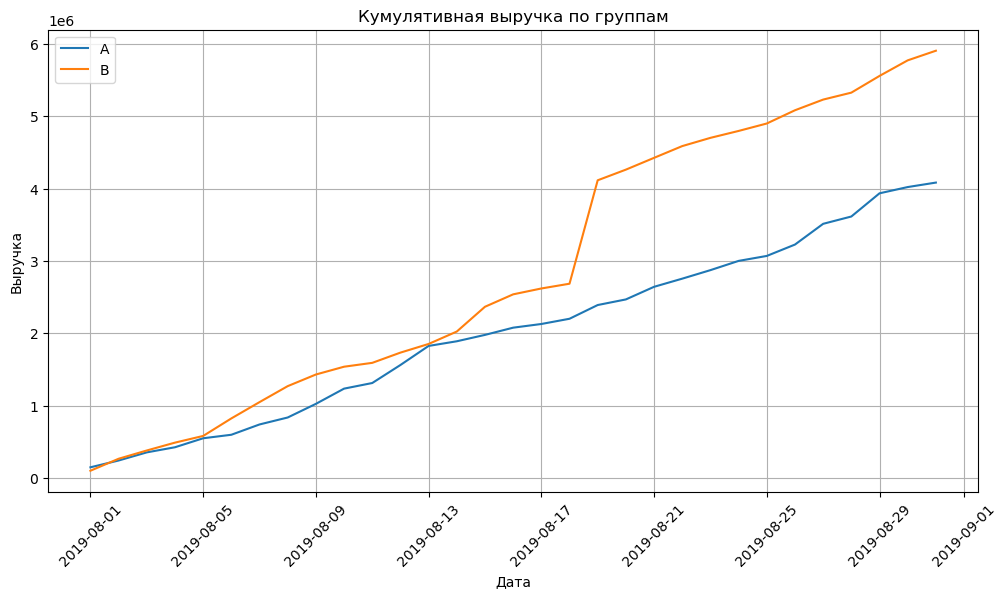

In [12]:
# Подготовим данные для кумулятивной выручки
dates_groups = orders[['date', 'group']].drop_duplicates()

cumulative_data = (dates_groups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'],
        orders['group'] == x['group'])]
    .agg({'date' : 'max',
          'group' : 'max',
          'transactionId' : 'nunique',
          'visitorId' : 'nunique',
          'revenue' : 'sum'}),
    axis=1)
                   .sort_values(by=['date', 'group']))

# Разделим данные на две группы
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date',
                                                                       'revenue',
                                                                       'transactionId']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date',
                                                                       'revenue',
                                                                       'transactionId']]

# Построим графики
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_a['date'],
         cumulative_revenue_a['revenue'],
         label='A')
plt.plot(cumulative_revenue_b['date'],
         cumulative_revenue_b['revenue'],
         label='B')

plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

На графике представлена кумулятивная выручка по группам A и B. Вот основные выводы и предположения:

- **Начальный рост**

Обе группы показывают устойчивый рост выручки на протяжении всего теста. Это ожидаемо, так как с течением времени количество заказов и общая выручка увеличиваются.

- **Разрыв между группами**

В первой половине теста выручка группы B слегка превышает выручку группы A. Однако примерно с середины теста наблюдается значительное увеличение разрыва между группами.

- **Резкий скачок для группы B**

Примерно в середине периода тестирования выручка группы B резко увеличивается. Это может указывать на наличие крупных заказов или выбросов (например, несколько очень дорогих заказов), которые могут искажать общую картину.

### График кумулятивного среднего чека по группам

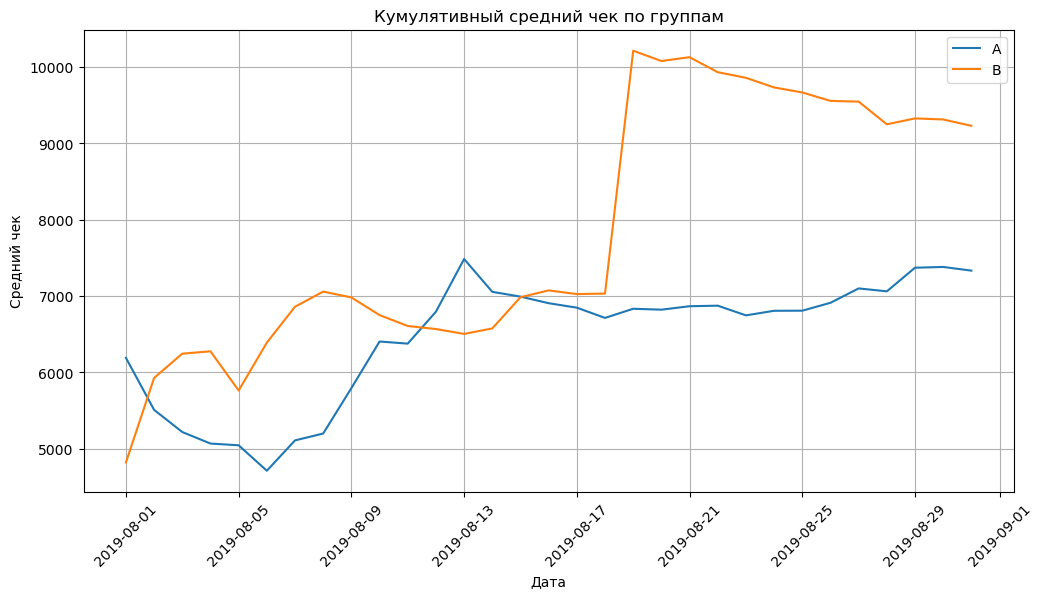

In [13]:
# Рассчитаем кумулятивный средний чек
cumulative_revenue_a['average_check'] = cumulative_revenue_a['revenue'] / cumulative_revenue_a['transactionId']
cumulative_revenue_b['average_check'] = cumulative_revenue_b['revenue'] / cumulative_revenue_b['transactionId']

# Построим график кумулятивного среднего чека
plt.figure(figsize=(12, 6))
plt.plot(cumulative_revenue_a['date'],
         cumulative_revenue_a['average_check'],
         label='A')
plt.plot(cumulative_revenue_b['date'],
         cumulative_revenue_b['average_check'],
         label='B')

plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

На графике представлен кумулятивный средний чек по группам A и B. Основываясь на данных графика, можно сделать следующие выводы и предположения:

- **Колебания среднего чека**

Обе группы показывают значительные колебания среднего чека в течение всего периода теста. Это может быть признаком того, что в данных присутствуют крупные заказы или выбросы.

- **Резкий скачок для группы B**

Как и на графике кумулятивной выручки, здесь мы видим резкий скачок среднего чека в группе B примерно в середине периода тестирования. Это подтверждает предположение о наличии аномальных заказов.

- **Стабилизация группы A**

К концу теста средний чек в группе A стабилизируется, в то время как в группе B он всё ещё показывает колебания.

- **Более высокий средний чек в группе B**

В целом, средний чек в группе B выше, чем в группе A. Однако без анализа выбросов и аномалий нельзя точно сказать, является ли это результатом успешного теста или влиянием крупных заказов.

### График относительного изменения кумулятивного среднего чека группы B к группе A

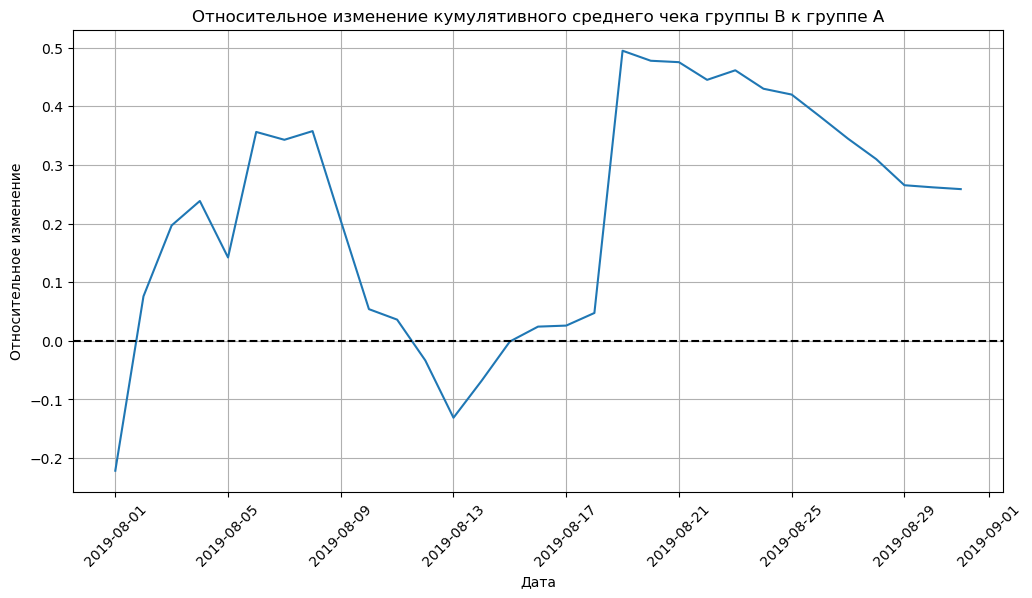

In [14]:
# Объединим данные двух групп
merged_cumulative_revenue = (cumulative_revenue_a.merge(cumulative_revenue_b,
                                                        left_on='date',
                                                        right_on='date',
                                                        how='left',
                                                        suffixes=['_a', '_b']))

# Рассчитаем относительное изменение кумулятивного среднего чека
merged_cumulative_revenue['relative_change'] = ((merged_cumulative_revenue['average_check_b']
                                                 / merged_cumulative_revenue['average_check_a'])
                                                - 1)

# Построим график
plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_revenue['date'], merged_cumulative_revenue['relative_change'])

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.axhline(y=0,
            color='black',
            linestyle='--')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

На графике представлено относительное изменение кумулятивного среднего чека группы B по отношению к группе A. Вот основные выводы и предположения:

- **Значительные колебания**

График показывает значительные колебания относительного изменения. Это указывает на наличие крупных заказов и выбросов в данных, особенно в группе B.

- **Резкие скачки и падения и нестабильность результатов**

На протяжении всего периода теста мы видим резкие скачки и падения. Особенно заметный рост для группы B происходит в середине периода, что согласуется с предыдущими наблюдениями о резком увеличении кумулятивного среднего чека. Такие резкие изменения говорят о нестабильности результатов теста, что затрудняет сделать однозначные выводы о превосходстве одной группы над другой.

### График кумулятивного среднего количества заказов на посетителя по группам

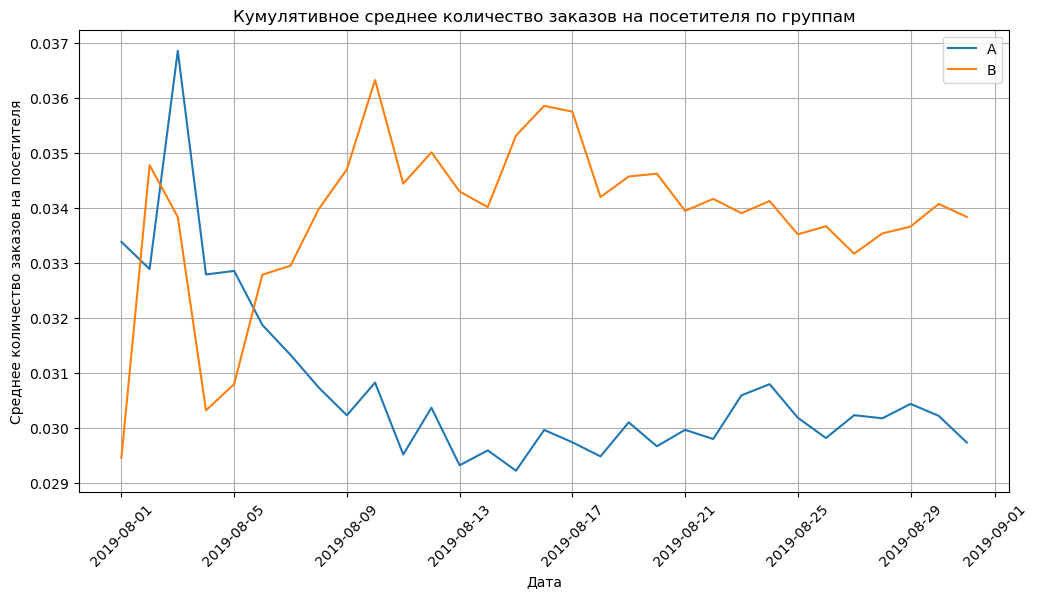

In [15]:
# Подготовим кумулятивные данные по количеству заказов и посетителей
cumulative_orders = (dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                                                        orders['group'] == x['group'])]
                                        .agg({'date': 'max',
                                              'group': 'max',
                                              'transactionId': pd.Series.nunique}),
                                        axis=1)
                     .sort_values(by=['date', 'group']))

cumulative_visitors = (dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],
                                                                            visitors['group'] == x['group'])]
                                          .agg({'date': 'max',
                                                'group': 'max',
                                                'visitors': 'sum'}),
                                          axis=1)
                       .sort_values(by=['date', 'group']))

# Объединение данных о заказах и посетителях
cumulative_data = pd.merge(cumulative_orders,
                           cumulative_visitors,
                           left_on=['date', 'group'],
                           right_on=['date', 'group'])

cumulative_data['orders_per_visitor'] = cumulative_data['transactionId'] / cumulative_data['visitors']

# Разделение данных на группы A и B
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(cumulative_data_a['date'],
         cumulative_data_a['orders_per_visitor'],
         label='A')
plt.plot(cumulative_data_b['date'],
         cumulative_data_b['orders_per_visitor'],
         label='B')

plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

На графике представлено кумулятивное среднее количество заказов на посетителя по группам A и B. Вот основные выводы и предположения:

- **Стабильность группы A**

График показывает, что в группе A среднее количество заказов на посетителя остаётся относительно стабильным на протяжении всего теста.

- **Колебания в группе B**

В группе B наблюдаются некоторые колебания. Это может указывать на изменения в поведении посетителей или наличие выбросов (например, несколько посетителей сделали больше заказов, чем обычно).

- **Разница между группами**

График показывает, что среднее количество заказов на посетителя в группе B часто выше, чем в группе A. Это может говорить о более высокой конверсии в покупку в группе B.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

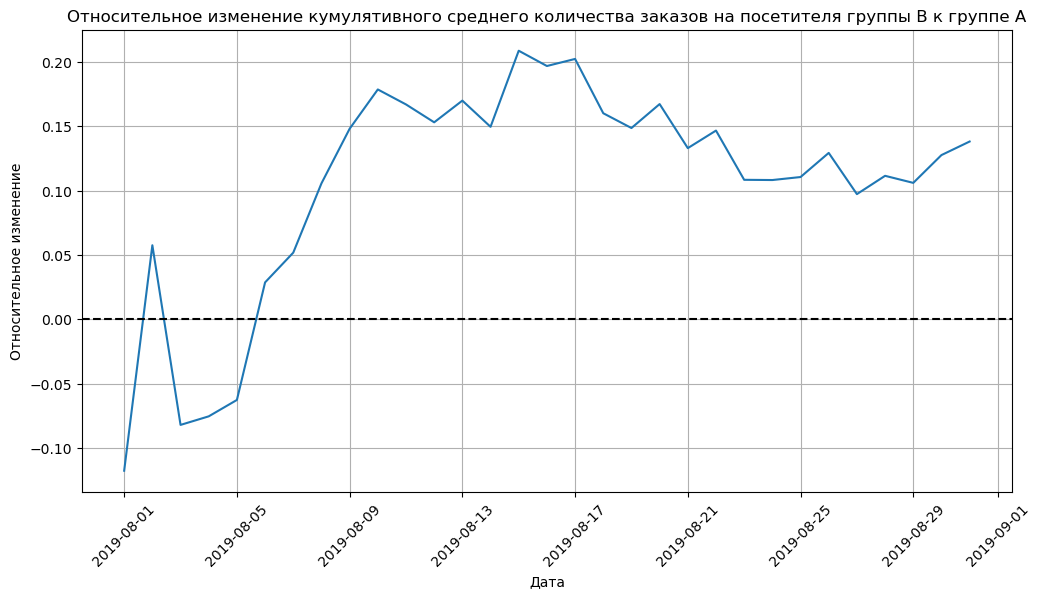

In [16]:
# Объединим данные по группам A и B
merged_cumulative_orders = (cumulative_data_a[['date', 'orders_per_visitor']]
                            .merge(cumulative_data_b[['date', 'orders_per_visitor']], 
                                   left_on='date',
                                   right_on='date',
                                   how='left',
                                   suffixes=['_a', '_b']))

# Рассчитаем относительное изменение
merged_cumulative_orders['relative_change'] = ((merged_cumulative_orders['orders_per_visitor_b']
                                                / merged_cumulative_orders['orders_per_visitor_a'])
                                               - 1)

# Построим график относительного изменения
plt.figure(figsize=(12, 6))
plt.plot(merged_cumulative_orders['date'], merged_cumulative_orders['relative_change'])

plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.axhline(y=0,
            color='black',
            linestyle='--')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

На графике изображено относительное изменение кумулятивного среднего количества заказов на посетителя группы B по сравнению с группой A. Вот основные выводы и предположения:

- **Колебания графика**

График показывает колебания относительного изменения среднего количества заказов на посетителя в течение всего теста. Это может указывать на различия в покупательском поведении между группами.

- **Тенденция к росту для группы B**

В начале теста относительное изменение колеблется около нулевой отметки, но затем мы видим тенденцию к росту для группы B, что может указывать на более высокую конверсию или на увеличение количества заказов на посетителя в этой группе.

- **Нестабильность результата**

Несмотря на общую тенденцию к росту, график показывает значительные колебания, что может свидетельствовать о нестабильности результата и возможном влиянии выбросов.

### График количества заказов по пользователям

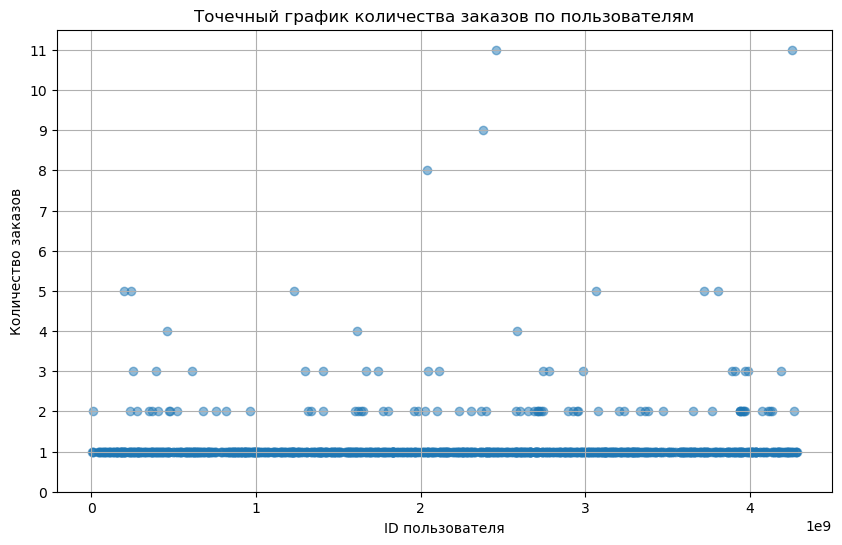

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

In [17]:
# Подготовим данные по количеству заказов на пользователя
orders_by_users = (orders.groupby('visitorId', as_index=False)
                   .agg({'transactionId': pd.Series.nunique}))

orders_by_users.columns = ['userId', 'orders']

# Построим точечный график
plt.figure(figsize=(10, 6))
plt.scatter(orders_by_users['userId'],
            orders_by_users['orders'],
            alpha=0.5)

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('ID пользователя')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.yticks(np.arange(0,
                     orders_by_users['orders'].max() + 1,
                     1))
plt.show()

# Выведем статистики для оценки распределения
orders_by_users['orders'].describe()

На точечном графике представлено распределение количества заказов по пользователям. Вот основные выводы и предположения:

- **Большинство пользователей совершили 1 заказ**

Подавляющее большинство пользователей сделали только один заказ. Это видно из скопления точек у значения 1 на оси ординат.

- **Наличие пользователей с большим количеством заказов**

Есть несколько пользователей, которые совершили больше заказов, чем большинство. Это видно из отдельных точек, которые находятся выше на графике. Например, есть пользователи с 2, 3 и даже 11 заказами.

- **Выбросы и аномалии**

Пользователи, совершившие большое количество заказов, могут быть аномальными пользователями. Например, пользователь с 11 заказами явно выбивается из общего распределения.

- **Статистические данные**

 - Среднее количество заказов на пользователя: 1.16
 - Медиана: 1 заказ на пользователя
 - Максимальное количество заказов: 11
 - Большинство пользователей (75%) сделали не более одного заказа.

### 95-й и 99-й перцентили количества заказов на пользователя

In [18]:
# Рассчитаем 95-й и 99-й перцентили количества заказов на пользователя
percentiles_1 = np.percentile(orders_by_users['orders'], [95, 99])

percentiles_1

array([2., 4.])

**Выбор границы для определения аномальных пользователей**

95-й и 99-й перцентили количества заказов на пользователя равны 2 и 4 соответственно. Это означает, что 95% пользователей сделали не более двух заказов, а 99% пользователей — не более четырех заказов.

С точки зрения логики 3-4 заказа не являются аномальным количеством, поэтому, если мы выберем 99-й перцентиль в качестве верхней границы выборки, мы изымем адекватные наблюдения в угоду точности оценки. По-моему мнению, так делать не стоит, поэтому в качестве границы я выбираю 99-й перцентиль.

In [19]:
# Отфильтруем датафрейм заказов по условию 99-го перцентиля (4 заказа на пользователя)
orders_filtered_by_count = (orders[~orders['visitorId']
                                   .isin(orders_by_users[orders_by_users['orders'] > percentiles_1[1]]['userId'])])

# Проверим результаты фильтрации
print('Количество изъятых наблюдений:', orders.shape[0] - orders_filtered_by_count.shape[0])
print('Доля изъятых наблюдений: {:.1f}%'.format((1
                                                 - orders_filtered_by_count.shape[0]
                                                 / orders.shape[0])
                                                 * 100))

Количество изъятых наблюдений: 69
Доля изъятых наблюдений: 5.8%


Изъято 69 наблюдений, или 5.8% выборки. Если бы мы выбрали 95-й перцентиль, мы бы потеряли 132 наблюдения, или 11.0% выборки.

### График стоимостей заказов

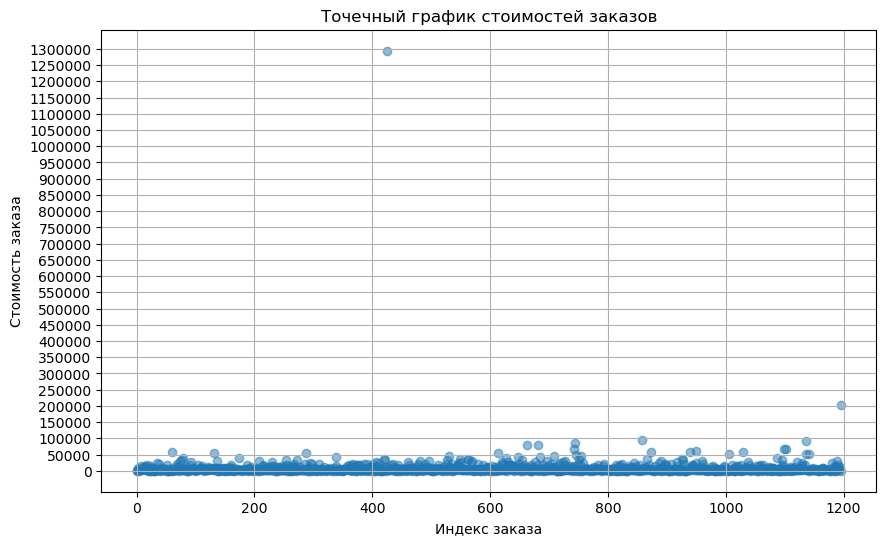

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

In [20]:
# Построение точечного графика стоимостей заказов
plt.figure(figsize=(10, 6))
plt.scatter(x=orders.index,
            y=orders['revenue'],
            alpha=0.5)

plt.title('Точечный график стоимостей заказов')
plt.xlabel('Индекс заказа')
plt.ylabel('Стоимость заказа')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='y')
plt.yticks(range(0,
                 int(orders['revenue'].max()) + 50000,
                 50000))
plt.show()

# Вывод статистических данных для оценки распределения
orders['revenue'].describe()

На точечном графике представлено распределение стоимости заказов. Вот основные выводы и предположения:

- **Распределение стоимости заказов**

Большинство заказов сосредоточено в нижней части графика, что указывает на то, что у большинства заказов относительно невысокая стоимость.

- **Аномальные заказы**

На графике заметны несколько точек, которые сильно отличаются от основной массы данных и находятся далеко выше других. Эти точки могут указывать на наличие аномально дорогих заказов.

- **Влияние аномалий и необходимость очистки данных**

Существенно высокие значения выручки отдельных заказов могут существенно влиять на средние показатели, такие как средний чек, особенно в небольших выборках, что может исказить результаты A/B-теста. Присутствие потенциальных выбросов подтверждает необходимость очистки данных перед проведением дальнейшего анализа, чтобы результаты были более надежными.

- **Статистические показатели**:
   - Средняя стоимость заказа составляет около 8348 ₽, однако стандартное отклонение велико (примерно 39 911 ₽), что указывает на широкое распределение данных.
   - Медианная стоимость заказа значительно меньше средней (около 2978 ₽), что также подтверждает влияние дорогих заказов на распределение.

### 95-й и 99-й перцентили стоимости заказов

In [21]:
# Рассчитаем 95-й и 99-й перцентили стоимости заказов
percentiles_2 = np.percentile(orders_filtered_by_count['revenue'], [95, 99])

percentiles_2

array([27582.5 , 57295.58])

**Выбор границы для определения аномальных заказов**

Поскольку в выборке много наблюдений, для которых стоимость заказа выше 95-го перцентиля, чтобы не потерять эти наблюдения, я выберу 99-й перцентиль в качестве верхней границы выборки. Значения до 99-го перцентиля являются адекватными.

In [22]:
# Отфильтруем датафрейм заказов по условию 99-го перцентиля (стоимость заказа 57295.58 ₽)
orders_filtered = (orders_filtered_by_count[orders_filtered_by_count['revenue'] <= percentiles_2[1]])

# Проверим результаты фильтрации
print('Количество изъятых наблюдений:',
      orders_filtered_by_count.shape[0] - orders_filtered.shape[0])
print('Доля изъятых наблюдений: {:.1f}%'.format(
    (1
     - orders_filtered.shape[0]
     / orders_filtered_by_count.shape[0])
    * 100))

Количество изъятых наблюдений: 12
Доля изъятых наблюдений: 1.1%


Изъято 12 наблюдений, или 1.1% уже отфильтрованной по количеству заказов выборки. Если бы мы выбрали 95-й перцентиль, мы бы потеряли 57 наблюдений, или 5.1% уже отфильтрованной по количеству заказов выборки.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

**Тест 1**

H0: Нет статистически значимой разницы в среднем количестве заказов на посетителя между группами A и B в "сырых" данных
<br>H1: Существует статистически значимая разница в среднем количестве заказов на посетителя между группами A и B в "сырых" данных

In [23]:
# Подготовим данные: количество заказов для каждого пользователя в группах A и B
orders_by_users_a = (orders[orders['group'] == 'A']
                     .groupby('visitorId', as_index=False)
                     .agg({'transactionId': pd.Series.nunique}))

orders_by_users_a.columns = ['userId', 'orders']

orders_by_users_b = (orders[orders['group'] == 'B']
                     .groupby('visitorId', as_index=False)
                     .agg({'transactionId': pd.Series.nunique}))

orders_by_users_b.columns = ['userId', 'orders']

# Создадим списки с количеством заказов каждого пользователя, включая нули
orders_a = (pd.concat([orders_by_users_a['orders'],
                       pd.Series(0,
                                 index=np.arange(visitors[visitors['group']=='A']['visitors'].sum()
                                                 - len(orders_by_users_a['orders'])),
                                 name='orders')],
                      axis=0))

orders_b = (pd.concat([orders_by_users_b['orders'],
                       pd.Series(0,
                                 index=np.arange(visitors[visitors['group']=='B']['visitors'].sum()
                                                 - len(orders_by_users_b['orders'])),
                                 name='orders')],
                      axis=0))

# Применим U-тест Манна-Уитни
results_orders = mannwhitneyu(orders_a, orders_b)

print('p-значение: {0:.3f}'.format(results_orders.pvalue))
print(f'Среднее количество заказов в группе A: {orders_a.mean():.3f}')
print(f'Среднее количество заказов в группе B: {orders_b.mean():.3f}')
print('Статистически значимое различие в среднем количестве заказов между группами (α = 0.05):', 'да' if results_orders.pvalue < 0.05 else 'нет')

p-значение: 0.017
Среднее количество заказов в группе A: 0.030
Среднее количество заказов в группе B: 0.034
Статистически значимое различие в среднем количестве заказов между группами (α = 0.05): да


U-тест Манна-Уитни на "сырых" данных показал, что между группами A и B существует значимая разница в среднем количестве заказов на посетителя.

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

**Тест 2**

H0: Средний чек заказа в группе A равен среднему чеку заказа в группе B в "сырых" данных
<br>H1: Средний чек заказа в группе A отличается от среднего чека заказа в группе B в "сырых" данных

In [24]:
# Подготовим данные: суммы заказов в группах A и B
revenue_a = orders[orders['group'] == 'A']['revenue']
revenue_b = orders[orders['group'] == 'B']['revenue']

# Применим U-тест Манна-Уитни
results_revenue = mannwhitneyu(revenue_a, revenue_b)

print('p-значение: {0:.3f}'.format(results_revenue.pvalue))
print(f'Средний чек в группе A: {revenue_a.mean():.2f} ₽')
print(f'Средний чек в группе B: {revenue_b.mean():.2f} ₽')
print('Статистически значимое различие в среднем чеке между группами (α = 0.05):', 'да' if results_revenue.pvalue < 0.05 else 'нет')

p-значение: 0.729
Средний чек в группе A: 7333.58 ₽
Средний чек в группе B: 9230.88 ₽
Статистически значимое различие в среднем чеке между группами (α = 0.05): нет


U-тест Манна-Уитни на "сырых" данных показал, что между группами A и B не существует разницы в среднем чеке.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

**Тест 3**

H0: Нет статистически значимой разницы в среднем количестве заказов на посетителя между группами A и B в "очищенных" данных
<br>H1: Существует статистически значимая разница в среднем количестве заказов на посетителя между группами A и B в "очищенных" данных

In [25]:
# Подготовим данные: количество заказов для каждого пользователя в группах A и B
orders_by_users_a_filtered = (orders_filtered[orders_filtered['group'] == 'A']
                              .groupby('visitorId', as_index=False)
                              .agg({'transactionId': pd.Series.nunique}))

orders_by_users_a_filtered.columns = ['userId', 'orders']

orders_by_users_b_filtered = (orders_filtered[orders_filtered['group'] == 'B']
                              .groupby('visitorId', as_index=False)
                              .agg({'transactionId': pd.Series.nunique}))

orders_by_users_b_filtered.columns = ['userId', 'orders']

# Создадим списки с количеством заказов каждого пользователя, включая нули
orders_filtered_a = (pd.concat([orders_by_users_a_filtered['orders'],
                       pd.Series(0,
                                 index=np.arange(visitors[visitors['group']=='A']['visitors'].sum()
                                                 - len(orders_by_users_a_filtered['orders'])),
                                 name='orders')],
                      axis=0))

orders_filtered_b = (pd.concat([orders_by_users_b_filtered['orders'],
                       pd.Series(0,
                                 index=np.arange(visitors[visitors['group']=='B']['visitors'].sum()
                                                 - len(orders_by_users_b_filtered['orders'])),
                                 name='orders')],
                      axis=0))

# Применим U-тест Манна-Уитни
results_orders_filtered = mannwhitneyu(orders_filtered_a, orders_filtered_b)


print('p-значение: {0:.3f}'.format(results_orders_filtered.pvalue))
print(f'Среднее количество заказов в группе A: {orders_filtered_a.mean():.3f}')
print(f'Среднее количество заказов в группе B: {orders_filtered_b.mean():.3f}')
print('Статистически значимое различие в среднем количестве заказов между группами (α = 0.05):', 'да' if results_orders_filtered.pvalue < 0.05 else 'нет')

p-значение: 0.013
Среднее количество заказов в группе A: 0.027
Среднее количество заказов в группе B: 0.032
Статистически значимое различие в среднем количестве заказов между группами (α = 0.05): да


U-тест Манна-Уитни на "очищенных" данных показал, что между группами A и B существует значимая разница в среднем количестве заказов на посетителя.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

**Тест 4**

H0: Средний чек заказа в группе A равен среднему чеку заказа в группе B в "очищенных" данных
<br>H1: Средний чек заказа в группе A отличается от среднего чека заказа в группе B в "очищенных" данных

In [26]:
# Подготовим данные: суммы заказов в группах A и B
revenue_filtered_a = orders_filtered[orders_filtered['group'] == 'A']['revenue']
revenue_filtered_b = orders_filtered[orders_filtered['group'] == 'B']['revenue']

# Примененим U-тест Манна-Уитни
results_revenue_filtered = mannwhitneyu(revenue_filtered_a, revenue_filtered_b)

print('p-значение: {0:.3f}'.format(results_revenue_filtered.pvalue))
print(f'Средний чек в группе A: {revenue_filtered_a.mean():.2f} ₽')
print(f'Средний чек в группе B: {revenue_filtered_b.mean():.2f} ₽')
print('Статистически значимое различие в среднем чеке между группами (α = 0.05):', 'да' if results_revenue_filtered.pvalue < 0.05 else 'нет')

p-значение: 0.982
Средний чек в группе A: 6492.68 ₽
Средний чек в группе B: 6391.43 ₽
Статистически значимое различие в среднем чеке между группами (α = 0.05): нет


U-тест Манна-Уитни на "очищенных" данных показал, что между группами A и B не существует разницы в среднем чеке.

## Решение по результатам A/B-теста
Варианты решений:
- Остановить тест, зафиксировать победу одной из групп;
- Остановить тест, зафиксировать отсутствие различий между группами;
- Продолжить тест.

In [27]:
results_df = pd.DataFrame({
    'Метрика': ['Различие в среднем количестве заказов на посетителя между группами по «сырым» данным',
                'Различие в среднем количестве заказов на посетителя между группами по «очищенным» данным',
                'Различие в среднем чеке заказа между группами по «сырым» данным',
                'Различие в среднем чеке заказа между группами по «очищенным» данным'],
    'p-значение (α = 0.05)': [results_orders.pvalue,
                   results_orders_filtered.pvalue,
                   results_revenue.pvalue,
                   results_revenue_filtered.pvalue],
    'Среднее в группе A': [orders_a.mean(),
                           orders_filtered_a.mean(),
                           revenue_a.mean(),
                           revenue_filtered_a.mean()],
    'Среднее в группе B': [orders_b.mean(),
                           orders_filtered_b.mean(),
                           revenue_b.mean(),
                           revenue_filtered_a.mean()],
'Статистическая значимость': ['да' if results_orders.pvalue < 0.05 else 'нет',
                              'да' if results_orders_filtered.pvalue < 0.05 else 'нет',
                              'да' if results_revenue.pvalue < 0.05 else 'нет',
                              'да' if results_revenue_filtered.pvalue < 0.05 else 'нет']})

results_df.set_index('Метрика', inplace=True)
results_df.round(3)

,p-значение (α = 0.05),Среднее в группе A,Среднее в группе B,Статистическая значимость
Метрика,,,,
Различие в среднем количестве заказов на посетителя между группами по «сырым» данным,0.017,0.030,0.034,да
Различие в среднем количестве заказов на посетителя между группами по «очищенным» данным,0.013,0.027,0.032,да
Различие в среднем чеке заказа между группами по «сырым» данным,0.729,7333.578,9230.875,нет
Различие в среднем чеке заказа между группами по «очищенным» данным,0.982,6492.683,6492.683,нет


**Анализ результатов**

- Количество заказов

И "сырые", и "очищенные" данные показывают статистически значимое различие в среднем количестве заказов между группами A и B на 99-процентном уровне значимости. В обоих случаях среднее количество заказов выше в группе B.

- Средний чек

Ни в "сырых", ни в "очищенных" данных не обнаружено статистически значимого различия в среднем чеке между группами на 99-процентном уровне значимости.

*P.S. При отсечении выборки на 95 перцентеле результат тестов не меняется.*

**Если основной интерес у заказчика исследования состоял в увеличении среднего количества заказов, то целесообразно остановить тест и зафиксировать победу группы B. Если же важен средний чек или необходимо более полное понимание динамики показателей, можно рассмотреть продолжение теста.**